In [34]:
import uproot
import numpy as np
from wc_helper import *
import fnmatch 
import matplotlib.pyplot as plt 
import mplhep as hep 

In [35]:
# comparing the sim channel **sink** from deposetsimchannelsink and depofluxwriter

simch = uproot.open("simchannelsink/waveform.root:wvfm")
depof = uproot.open("depofluxwriter/waveform.root:wvfm")

simch_dec_names = fnmatch.filter(simch.keys(), '*run_*_sub_*_evt_*_decon*')
simch_sim_names = fnmatch.filter(simch.keys(), '*run_*_sub_*_evt_*_sim*')
simch_raw_names = fnmatch.filter(simch.keys(), '*run_*_sub_*_evt_*_raw*')

depof_dec_names = fnmatch.filter(depof.keys(), '*run_*_sub_*_evt_*_decon*')
depof_sim_names = fnmatch.filter(depof.keys(), '*run_*_sub_*_evt_*_sim*')
depof_raw_names = fnmatch.filter(depof.keys(), '*run_*_sub_*_evt_*_raw*')

In [36]:
evtnum = 0
simch_sim = simch[simch_sim_names[evtnum]].values()
simch_dec = simch[simch_dec_names[evtnum]].values()*50

depof_sim = depof[depof_sim_names[evtnum]].values()
depof_dec = depof[depof_dec_names[evtnum]].values()*50

In [37]:
simch_sim_sum = np.sum(simch_sim, axis=1)
depof_sim_sum = np.sum(depof_sim, axis=1)

ch_arr = np.arange(0,len(simch_sim_sum))

In [38]:
np.where(np.sum(depof_dec,axis=1)>10)

(array([  575,   576,   577, ..., 11171, 11203, 11210]),)

In [39]:
this_simch = u0_ch(simch_sim_sum)
this_depof = u0_ch(depof_sim_sum)
this_ch    = u0_ch(ch_arr)
nonzero_ch = np.where(this_simch > 0)[0]

print("total charge difference is: ", np.sum(this_simch - this_depof))
# plt.bar(this_ch, this_simch - this_depof)
# plt.show()

total charge difference is:  1.9122009


In [40]:
np.sum(this_depof)

32973810.0

In [41]:
42/np.sum(this_simch)

1.2737381576469324e-06

/sbnd/app/users/lynnt/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


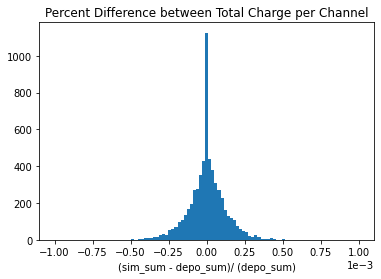

In [42]:
plt.hist((simch_sim_sum - depof_sim_sum)/depof_sim_sum,np.linspace(-1e-3,1e-3,100))
# set x tick labels to scientific notation
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.title("Percent Difference between Total Charge per Channel")
plt.xlabel("(sim_sum - depo_sum)/ (depo_sum)")
plt.show()

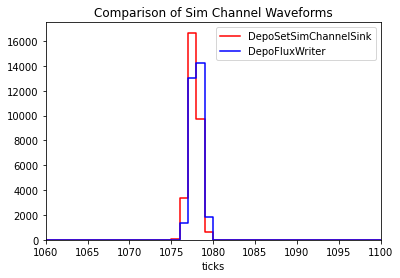

In [47]:
ch = nonzero_ch[20]

simch_sim_wvfm = simch[simch_sim_names[evtnum]].values()[ch]
depof_sim_wvfm = depof[depof_sim_names[evtnum]].values()[ch]

hep.histplot(simch_sim_wvfm, histtype='step', label='DepoSetSimChannelSink',color="red")
hep.histplot(depof_sim_wvfm, histtype='step', label='DepoFluxWriter',color="blue")

plt.legend()
plt.xlabel("ticks")
plt.xlim(1060, 1100)
plt.title("Comparison of Sim Channel Waveforms")
plt.show()